In [38]:
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
datagen = image.ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [3]:
original_data_dir = 'C:/Python/keras_training/dogs-vs-cats/source/train'
base_dir = 'C:/Python/keras_training/dogs-vs-cats/dogs-vs-cats_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

In [7]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [8]:
img_path = fnames[3]

In [9]:
img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

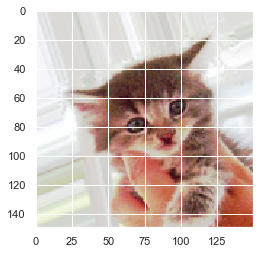

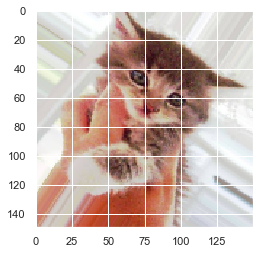

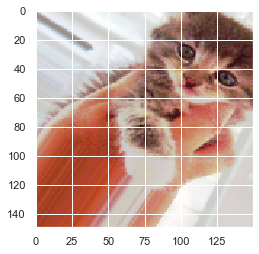

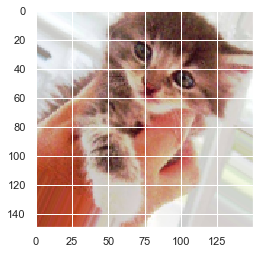

In [13]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [16]:
train_datagen = image.ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)

In [17]:
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_geneator = test_datagen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_geneator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6935 - acc: 0.5259 - val_loss: 0.6867 - val_acc: 0.5063
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6820 - acc: 0.5650 - val_loss: 0.6634 - val_acc: 0.5915
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6724 - acc: 0.5803 - val_loss: 0.6479 - val_acc: 0.6179
Epoch 4/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6575 - acc: 0.6066 - val_loss: 0.6309 - val_acc: 0.6332
Epoch 5/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6463 - acc: 0.6131 - val_loss: 0.6571 - val_acc: 0.5934
Epoch 6/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6253 - acc: 0.6391 - val_loss: 0.6228 - val_acc: 0.6110
Epoch 7/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6143 - acc: 0.6587 - val_loss: 0.5847 - val_acc: 0.6791
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 183ms/step - loss: 0.4021 - acc: 0.8119 - val_loss: 0.4872 - val_acc: 0.7741
Epoch 62/100
100/100 [==============================] - 18s 183ms/step - loss: 0.3994 - acc: 0.8181 - val_loss: 0.4728 - val_acc: 0.7887
Epoch 63/100
100/100 [==============================] - 18s 182ms/step - loss: 0.4014 - acc: 0.8153 - val_loss: 0.4102 - val_acc: 0.8096
Epoch 64/100
100/100 [==============================] - 18s 178ms/step - loss: 0.4030 - acc: 0.8106 - val_loss: 0.4473 - val_acc: 0.7938
Epoch 65/100
100/100 [==============================] - 17s 167ms/step - loss: 0.3929 - acc: 0.8200 - val_loss: 0.4540 - val_acc: 0.7982
Epoch 66/100
100/100 [==============================] - 17s 171ms/step - loss: 0.3950 - acc: 0.8281 - val_loss: 0.4257 - val_acc: 0.8215
Epoch 67/100
100/100 [==============================] - 17s 169ms/step - loss: 0.3915 - acc: 0.8200 - val_loss: 0.4416 - val_acc: 0.8106
Epoch 68/100
100/100 [===================

In [29]:
model.save('cats_vs_dogs_small_2.h5')

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

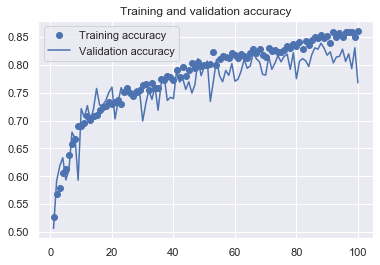

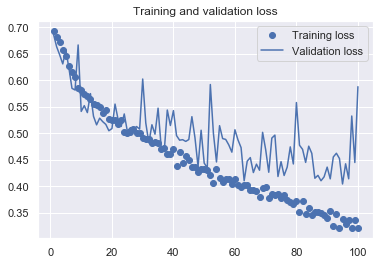

In [31]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [36]:
conv_base = vgg16.VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 10s 0us/step


In [37]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [39]:
datagen = image.ImageDataGenerator(rescale=1./255)
batch_size = 20

In [42]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [43]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [45]:
model = models.Sequential()
model.add(layers.Dense(265,
                       activation='relu',
                       input_dim=4*4*512))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [48]:
history = model.fit(train_features,
                   train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 961us/step - loss: 0.6182 - acc: 0.6595 - val_loss: 0.4401 - val_acc: 0.8440
Epoch 2/30
2000/2000 [==============================] - 1s 455us/step - loss: 0.4225 - acc: 0.8135 - val_loss: 0.3640 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 1s 445us/step - loss: 0.3653 - acc: 0.8420 - val_loss: 0.3246 - val_acc: 0.8750
Epoch 4/30
2000/2000 [==============================] - 1s 442us/step - loss: 0.3225 - acc: 0.8565 - val_loss: 0.2979 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 1s 444us/step - loss: 0.2892 - acc: 0.8820 - val_loss: 0.2821 - val_acc: 0.8990
Epoch 6/30
2000/2000 [==============================] - 1s 447us/step - loss: 0.2695 - acc: 0.8900 - val_loss: 0.2714 - val_acc: 0.8890
Epoch 7/30
2000/2000 [==============================] - 1s 443us/step - loss: 0.2479 - acc: 0.9075 - val_loss: 0.2616 - val_acc: 0.9000


In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

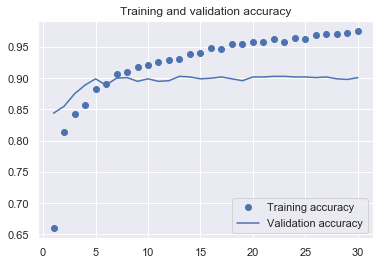

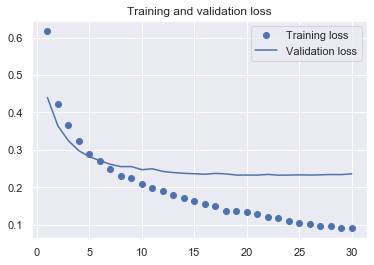

In [50]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();